### Kehua Chu (uid: 806153163)
##### Due:  Thu, Mar 14, 6pm in Bruinlearn

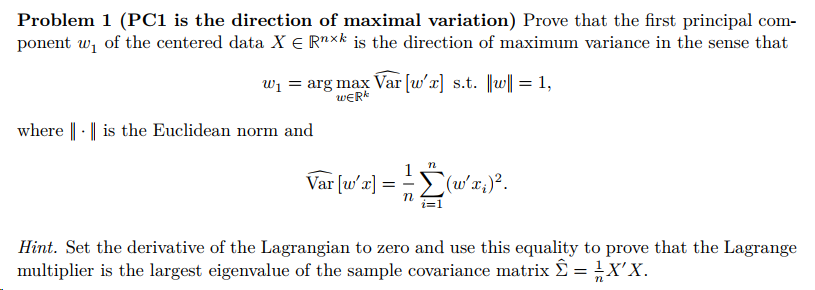

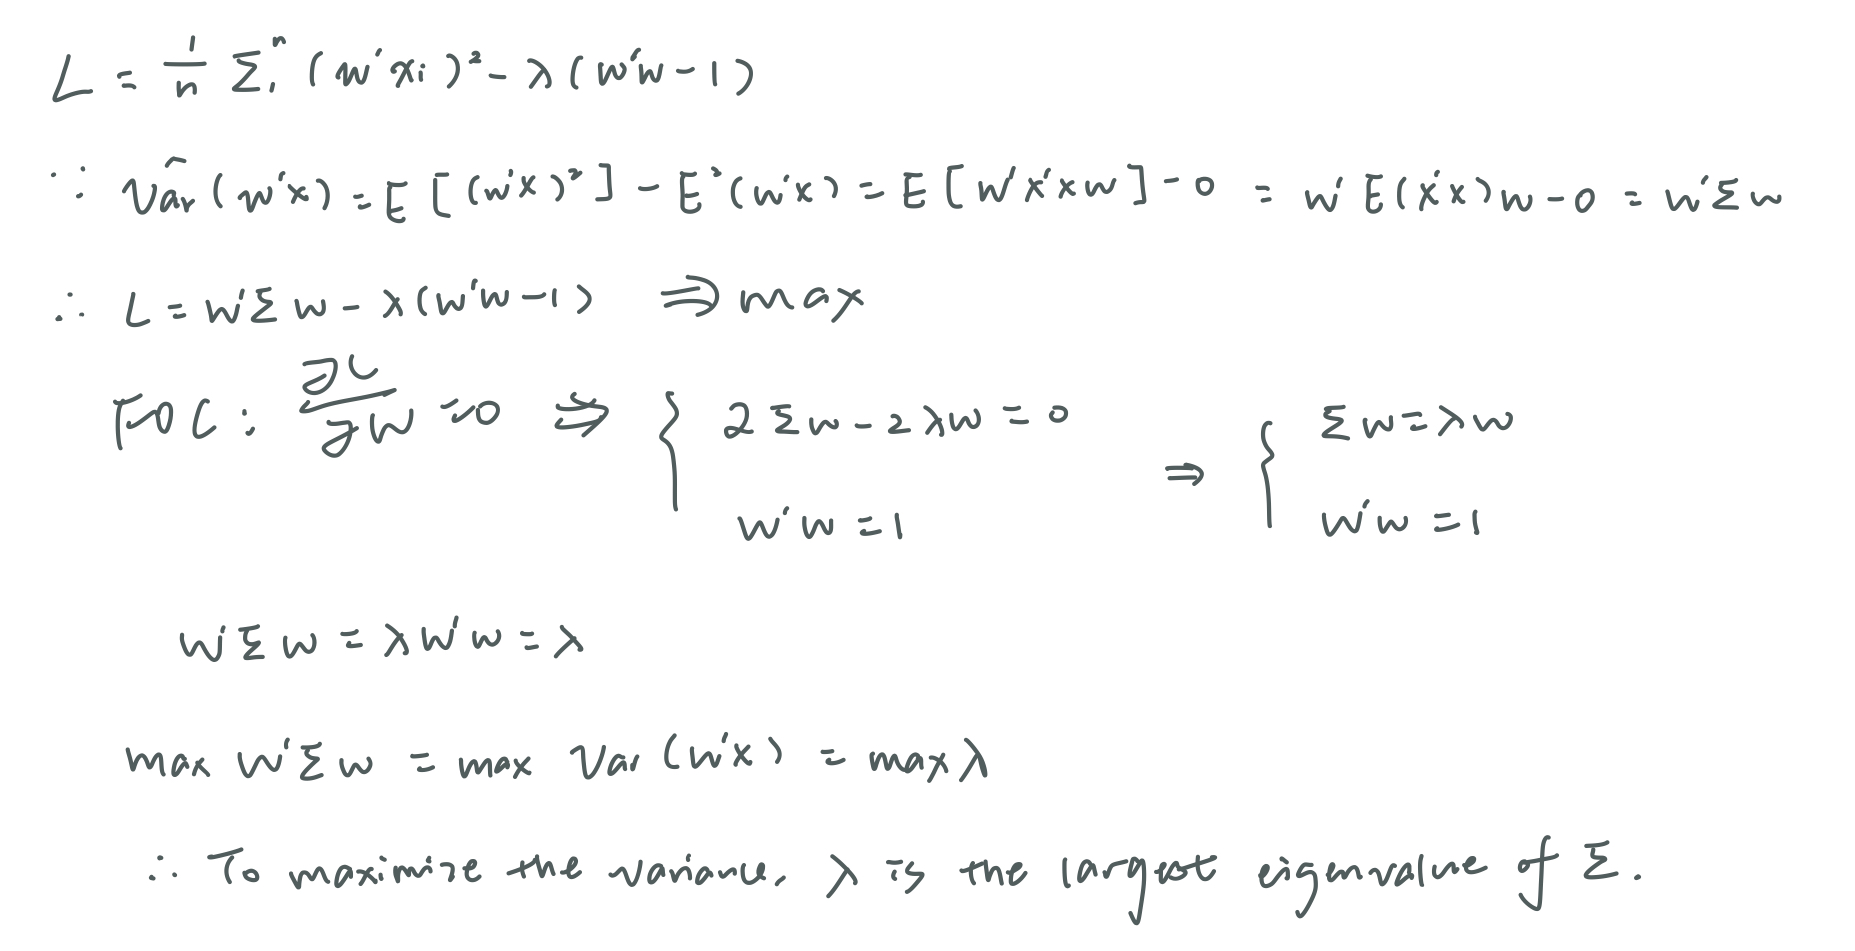

### Import Module

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_olivetti_faces
from sklearn.decomposition import PCA



### Problem 2 (K-means clustering)

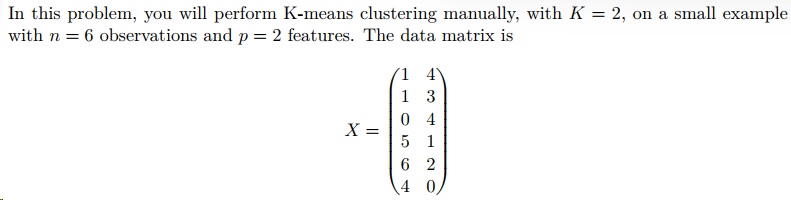

### (a) Plot the observations

In [2]:
X = np.array([[1, 4],
              [1, 3],
              [0, 4],
              [5, 1],
              [6, 2],
              [4, 0]])

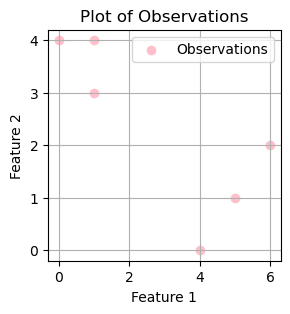

In [3]:
plt.figure(figsize=(3,3))
plt.scatter(X[:, 0], X[:, 1], c='pink', marker='o', label='Observations')
plt.title('Plot of Observations')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()


### (b) Randomly assign a cluster label to each observation. You can use the np.random.choice() function to do this. Report the cluster labels for each observation.

In [4]:
cluster_labels = np.random.choice(range(2), size=6)

X_with_labels = np.hstack((X, cluster_labels.reshape(-1, 1)))

print("Observation   Feature 1   Feature 2   Cluster Label")
for i, row in enumerate(X_with_labels):
    print(f"{i+1}              {row[0]}           {row[1]}           {int(row[2])}")

Observation   Feature 1   Feature 2   Cluster Label
1              1           4           1
2              1           3           0
3              0           4           0
4              5           1           1
5              6           2           0
6              4           0           1


### (c) Compute the centroid for each cluster.



In [5]:
def compute_centroids(X, cluster_labels, centroids):
    centroids = []
    centroids = centroids
    unique_labels = np.unique(cluster_labels)
    for label in unique_labels:
        cluster_points = X[cluster_labels == label]
        centroid = np.mean(cluster_points, axis=0)
        centroids.append(centroid)
    return centroids


In [7]:
centroids = []
centroids = compute_centroids(X, cluster_labels, centroids)

In [8]:
print("Centroids:")
for i, centroid in enumerate(centroids):
    print(f"Cluster {i+1}: {centroid}")

Centroids:
Cluster 1: [2.33333333 3.        ]
Cluster 2: [3.33333333 1.66666667]


### (d) Assign each observation to the centroid to which it is closest, in terms of Euclidean distance. Report the cluster labels for each observation.

In [9]:
def assign_cluster_label(X, centroids):
    
    centroids = np.array(centroids)

    distances = np.sqrt(np.sum((X[:, np.newaxis, :] - centroids) ** 2, axis=2))

    new_cluster_labels = np.argmin(distances, axis=1)

    return new_cluster_labels


In [10]:
cluster_labels = assign_cluster_label(X, centroids)

In [11]:
print("New Cluster Labels:")
for i, label in enumerate(cluster_labels):
    print(f"Observation {i+1}: Cluster {label+1}")

New Cluster Labels:
Observation 1: Cluster 1
Observation 2: Cluster 1
Observation 3: Cluster 1
Observation 4: Cluster 2
Observation 5: Cluster 2
Observation 6: Cluster 2


### (e) Repeat (c) and (d) until the answers obtained stop changing.

#### Repeat 1

In [12]:
centroids = compute_centroids(X, cluster_labels, centroids)

In [13]:
print("Centroids:")
for i, centroid in enumerate(centroids):
    print(f"Cluster {i+1}: {centroid}")

Centroids:
Cluster 1: [0.66666667 3.66666667]
Cluster 2: [5. 1.]


In [14]:
cluster_labels = assign_cluster_label(X, centroids)

In [15]:
print("New Cluster Labels:")
for i, label in enumerate(cluster_labels):
    print(f"Observation {i+1}: Cluster {label+1}")

New Cluster Labels:
Observation 1: Cluster 1
Observation 2: Cluster 1
Observation 3: Cluster 1
Observation 4: Cluster 2
Observation 5: Cluster 2
Observation 6: Cluster 2


#### Repeat 2

In [16]:
centroids = compute_centroids(X, cluster_labels, centroids)

In [17]:
print("Centroids:")
for i, centroid in enumerate(centroids):
    print(f"Cluster {i+1}: {centroid}")

Centroids:
Cluster 1: [0.66666667 3.66666667]
Cluster 2: [5. 1.]


In [18]:
cluster_labels = assign_cluster_label(X, centroids)

In [19]:
print("New Cluster Labels:")
for i, label in enumerate(cluster_labels):
    print(f"Observation {i+1}: Cluster {label+1}")

New Cluster Labels:
Observation 1: Cluster 1
Observation 2: Cluster 1
Observation 3: Cluster 1
Observation 4: Cluster 2
Observation 5: Cluster 2
Observation 6: Cluster 2


#### Now the results stop changing.

### (f) In your plot from (a), color the observations according to the cluster labels obtained

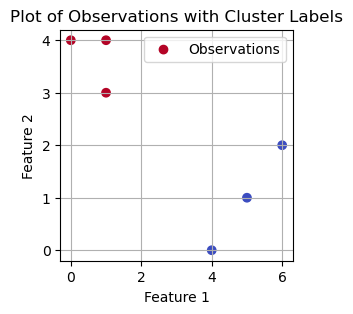

In [20]:
def plot_with_labels(X, cluster_labels):
    plt.figure(figsize=(3,3))
    plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='coolwarm', marker='o', label='Observations')
    plt.title('Plot of Observations with Cluster Labels')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid(True)
    plt.show()

X = np.array([[1, 4],
              [1, 3],
              [0, 4],
              [5, 1],
              [6, 2],
              [4, 0]])
cluster_labels = np.array([2, 2, 2, 1, 1, 1])  

plot_with_labels(X, cluster_labels)

### Problem 3 (PCA on Olivetti faces)

### Use the Olivetti faces dataset available through sklearn to do the following

### (a) Fetch and load the data with the fetch_olivetti_faces method from sklearn.datasets.

In [2]:
faces_data = fetch_olivetti_faces()
faces_data

{'data': array([[0.30991736, 0.3677686 , 0.41735536, ..., 0.15289256, 0.16115703,
         0.1570248 ],
        [0.45454547, 0.47107437, 0.5123967 , ..., 0.15289256, 0.15289256,
         0.15289256],
        [0.3181818 , 0.40082645, 0.49173555, ..., 0.14049587, 0.14876033,
         0.15289256],
        ...,
        [0.5       , 0.53305787, 0.607438  , ..., 0.17768595, 0.14876033,
         0.19008264],
        [0.21487603, 0.21900827, 0.21900827, ..., 0.57438016, 0.59090906,
         0.60330576],
        [0.5165289 , 0.46280992, 0.28099173, ..., 0.35950413, 0.3553719 ,
         0.38429752]], dtype=float32),
 'images': array([[[0.30991736, 0.3677686 , 0.41735536, ..., 0.37190083,
          0.3305785 , 0.30578512],
         [0.3429752 , 0.40495867, 0.43801653, ..., 0.37190083,
          0.338843  , 0.3140496 ],
         [0.3429752 , 0.41735536, 0.45041323, ..., 0.38016528,
          0.338843  , 0.29752067],
         ...,
         [0.21487603, 0.20661157, 0.2231405 , ..., 0.15289256,
     

### (b) Demean each face in the data set (no need to divide by standard deviation as every dimension is a number between a fixed range representing a pixel)

In [3]:
X = faces_data.data  
y = faces_data.target  

In [4]:
mean_face = X.mean(axis=0)
X_demeaned = X - mean_face

In [11]:
X_demeaned


array([[-0.09021699, -0.06646687, -0.05892554, ..., -0.1685228 ,
        -0.15248989, -0.15342984],
       [ 0.05441111,  0.03683892,  0.0361158 , ..., -0.1685228 ,
        -0.16075435, -0.15756208],
       [-0.08195254, -0.033409  ,  0.01545465, ..., -0.1809195 ,
        -0.16488658, -0.15756208],
       ...,
       [ 0.09986565,  0.09882241,  0.13115713, ..., -0.14372942,
        -0.16488658, -0.120372  ],
       [-0.18525833, -0.21522719, -0.25727263, ...,  0.2529648 ,
         0.27726215,  0.29285112],
       [ 0.11639455,  0.02857447, -0.19528916, ...,  0.03808877,
         0.04172498,  0.07384288]], dtype=float32)

### (c) Compute and display the first 9 eigenfaces. The 𝑘-th eigenface of a given face is an image based on the first 𝑘 principal components only.

In [5]:
pca = PCA(n_components=X.shape[0])  # Use all components
pca.fit(X_demeaned)


PCA(n_components=400)

In [6]:
eigenfaces = pca.components_

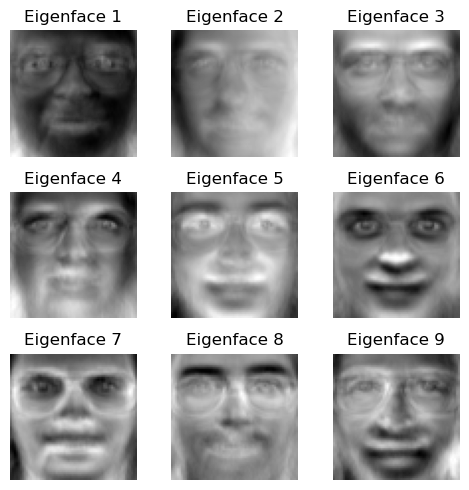

In [7]:
plt.figure(figsize=(5, 5))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    eigenface = eigenfaces[i].reshape(faces_data.images[0].shape)
    plt.imshow(eigenface, cmap='gray')
    plt.title(f"Eigenface {i + 1}")
    plt.axis('off')

plt.tight_layout()
plt.show()

### (d) Any given face in the data set can be represented as a linear combination of the eigenfaces. For any face in the data set, show how it progresses as we combine 1, 51, 101, … eigenfaces, until the full image is recovered.

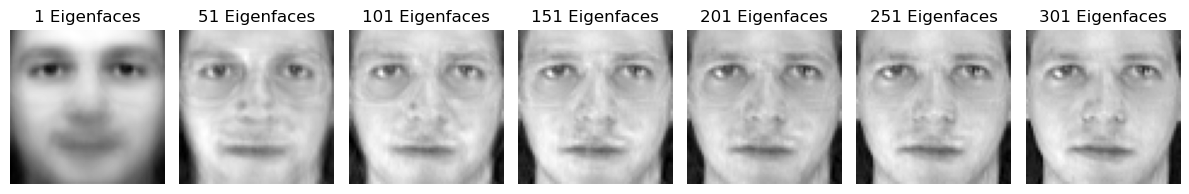

In [13]:
face_index = 0
chosen_face = X[face_index]

# Plot the reconstruction process
plt.figure(figsize=(12, 4))
steps = [1, 51, 101, 151, 201, 251, 301]  # Choose the number of eigenfaces to combine
for i, num_eigenfaces in enumerate(steps):
    reconstructed_face = mean_face.copy()
    for j in range(num_eigenfaces):
        coefficient = np.dot(X_demeaned[face_index], eigenfaces[j])
        reconstructed_face += coefficient * eigenfaces[j]
    plt.subplot(1, len(steps), i + 1)
    plt.imshow(reconstructed_face.reshape(faces_data.images[0].shape), cmap='gray')
    plt.title(f"{num_eigenfaces} Eigenfaces")
    plt.axis('off')

plt.tight_layout()
plt.show()

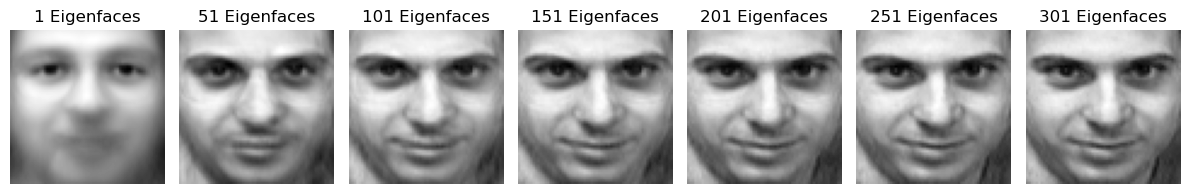

In [10]:
face_index = 80
chosen_face = X[face_index]

# Plot the reconstruction process
plt.figure(figsize=(12, 4))
steps = [1, 51, 101, 151, 201, 251, 301]  # Choose the number of eigenfaces to combine
for i, num_eigenfaces in enumerate(steps):
    reconstructed_face = mean_face.copy()
    for j in range(num_eigenfaces):
        coefficient = np.dot(X_demeaned[face_index], eigenfaces[j])
        reconstructed_face += coefficient * eigenfaces[j]
    plt.subplot(1, len(steps), i + 1)
    plt.imshow(reconstructed_face.reshape(faces_data.images[0].shape), cmap='gray')
    plt.title(f"{num_eigenfaces} Eigenfaces")
    plt.axis('off')

plt.tight_layout()
plt.show()